<a href="https://colab.research.google.com/github/saadys/Stock_prediction/blob/main/final_prediction_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/LSTM prodection/AMZN.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6511,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
6512,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
6513,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
6514,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500


In [ ]:
data=data[['Date','Close']]

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])


<ipython-input-4-1a72a8b5b870>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


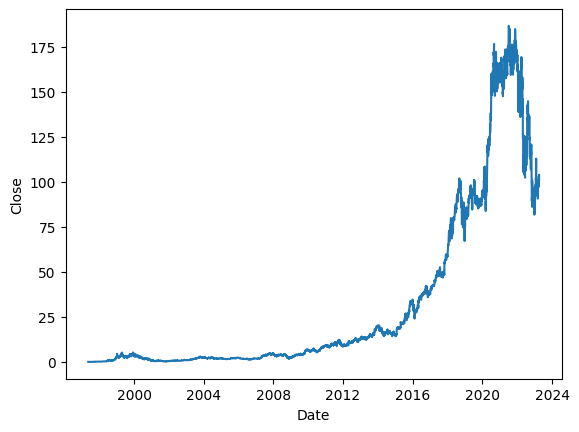

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['Date'],data['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

## LSTM Neural Network Architecture



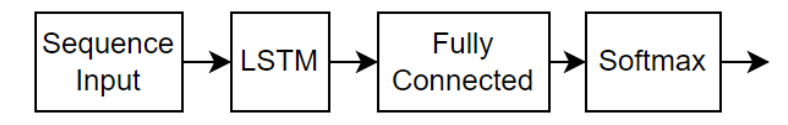

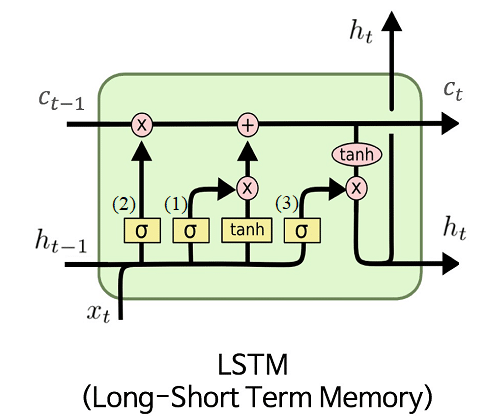

In [ ]:
from copy import deepcopy as dc

def prepare_data_frame(df, n_steps):
    df = dc(df)
    df.set_index('Date', inplace=True)  #  'Date' comme index

    for i in range(1, n_steps + 1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

In [ ]:
no_steps=7
shifted_df=prepare_data_frame(data,no_steps)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
1997-05-27,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
1997-05-28,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
1997-05-29,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
1997-05-30,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
1997-06-02,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354
...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999


In [ ]:
shifted_df_to_np=shifted_df.to_numpy()
shifted_df_to_np

array([[7.91670000e-02, 7.50000000e-02, 6.97920000e-02, ...,
        8.54170000e-02, 8.64580000e-02, 9.79170000e-02],
       [7.65630000e-02, 7.91670000e-02, 7.50000000e-02, ...,
        8.17710000e-02, 8.54170000e-02, 8.64580000e-02],
       [7.52600000e-02, 7.65630000e-02, 7.91670000e-02, ...,
        7.13540000e-02, 8.17710000e-02, 8.54170000e-02],
       ...,
       [1.02410004e+02, 1.03290001e+02, 1.02000000e+02, ...,
        9.80400010e+01, 9.81299970e+01, 9.87099990e+01],
       [1.03949997e+02, 1.02410004e+02, 1.03290001e+02, ...,
        9.72399980e+01, 9.80400010e+01, 9.81299970e+01],
       [1.01099998e+02, 1.03949997e+02, 1.02410004e+02, ...,
        1.00250000e+02, 9.72399980e+01, 9.80400010e+01]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
shifted_df_to_np=scaler.fit_transform(shifted_df_to_np)

In [ ]:
shifted_df_to_np

array([[-0.99991063, -0.99995531, -1.        , ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99993855, -0.99991063, -0.99994415, ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99995253, -0.99993855, -0.99989946, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.09747299,  0.10690997,  0.09308121, ...,  0.0506149 ,
         0.05158   ,  0.05779984],
       [ 0.11398769,  0.09747299,  0.10691495, ...,  0.04203581,
         0.0506149 ,  0.05158   ],
       [ 0.08342464,  0.11398769,  0.09747802, ...,  0.07431453,
         0.04203581,  0.0506149 ]])

In [ ]:
X1=shifted_df_to_np[:,1:]
Y=shifted_df_to_np[:,0]
X1.shape , Y.shape

((6509, 7), (6509,))

In [ ]:
X1

array([[-0.99995531, -1.        , -0.99998325, ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99991063, -0.99994415, -1.        , ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99993855, -0.99989946, -0.99994415, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.10690997,  0.09308121,  0.07431453, ...,  0.0506149 ,
         0.05158   ,  0.05779984],
       [ 0.09747299,  0.10691495,  0.09308121, ...,  0.04203581,
         0.0506149 ,  0.05158   ],
       [ 0.11398769,  0.09747802,  0.10691495, ...,  0.07431453,
         0.04203581,  0.0506149 ]])

In [ ]:
import numpy as np
X1=dc(np.flip(X1,axis=1))
X1

array([[-0.99969839, -0.99982128, -0.99983244, ..., -0.99998325,
        -1.        , -0.99995531],
       [-0.99982128, -0.99983244, -0.99987154, ..., -1.        ,
        -0.99994415, -0.99991063],
       [-0.99983244, -0.99987154, -0.99998325, ..., -0.99994415,
        -0.99989946, -0.99993855],
       ...,
       [ 0.05779984,  0.05158   ,  0.0506149 , ...,  0.07431453,
         0.09308121,  0.10690997],
       [ 0.05158   ,  0.0506149 ,  0.04203581, ...,  0.09308121,
         0.10691495,  0.09747299],
       [ 0.0506149 ,  0.04203581,  0.07431453, ...,  0.10691495,
         0.09747802,  0.11398769]])

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split( X1, Y, test_size=0.1, random_state=42)

In [ ]:
#X_train.shape ,X_test.shape,y_train.shape,y_test.shape

In [ ]:
taille_de_split=int(len(X1)*0.95)
X_train=X1[:taille_de_split]
X_test=X1[taille_de_split:]

y_train=Y[:taille_de_split]
y_test=Y[taille_de_split:]

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)


In [ ]:
X_train.shape ,X_test.shape,y_train.shape,y_test.shape

((6183, 7, 1), (326, 7, 1), (6183, 1), (326, 1))

In [ ]:
import torch

In [ ]:
X_train=torch.tensor(X_train).float()
X_test=torch.tensor(X_test).float()
y_train=torch.tensor(y_train).float()
y_test=torch.tensor(y_test).float()


In [ ]:
X_train.shape ,X_test.shape,y_train.shape,y_test.shape

(torch.Size([6183, 7, 1]),
 torch.Size([326, 7, 1]),
 torch.Size([6183, 1]),
 torch.Size([326, 1]))

In [ ]:
from torch.utils.data import Dataset

class LoadData(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [ ]:
training_data=LoadData(X_train,y_train)
test_data=LoadData(X_test,y_test)

In [ ]:
from torch.utils.data import DataLoader
batch_size=16
train_dataloader = DataLoader(training_data, batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size, shuffle=True)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


Using cuda device


In [ ]:
for _,batch in enumerate(train_dataloader):
    x_batch  , y_batch =batch[0].to(device),batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


h0: État caché initial, qui représente la mémoire à court terme.

c0: : État de cellule initial, qui représente la mémoire à long terme.





In [ ]:
import torch
import torch.nn as nn

class LSTM(nn.Module):
    # input_size : La taille des vecteurs d'entrée pour chaque pas de temps.
    # hidden_size : Le nombre de neurones dans l'état caché.
    # n_stacked_layers : Nombre de couches empilées dans le LSTM.
    def __init__(self, input_size, hidden_size, n_stacked_layers):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.n_stacked_layers = n_stacked_layers

        # Définir le LSTM et la couche fully connected
        self.lstm = nn.LSTM(input_size, hidden_size, n_stacked_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # Initialiser h0 et c0
        # Dimension de h0 et c0 : (n_stacked_layers, batch_size, hidden_size)
        batch_size = x.size(0)
        h0 = torch.zeros(self.n_stacked_layers, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.n_stacked_layers, batch_size, self.hidden_size).to(x.device)

        # Propagation dans le LSTM
        output, (hn, cn) = self.lstm(x, (h0, c0))

        output = self.fc(output[:, -1, :])  # Dimension finale : (batch_size, 1)
        return output


# Tester le modèle
model = LSTM(1, 4, 1).to(device)
print(model)


LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


In [ ]:
import torch.optim as optim

criterion = nn.MSELoss()
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
train_dataloader

In [ ]:
num_epochs = 10

def train_by_batch():
    model.train()  # Active le mode entraînement
    for epoch in range(num_epochs):
        running_loss = 0.0
        print(f"Epoch {epoch+1}/{num_epochs}")

        for batch_index, batch in enumerate(train_dataloader):
            # Charger les données sur le device
            x_batch, y_batch = batch[0].to(device), batch[1].to(device)

            output = model(x_batch)
            loss = criterion(output, y_batch)

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()
            running_loss += loss.item()

        print(f"Loss: {running_loss / len(train_dataloader):.4f}")


In [ ]:
def validate_one_epoch():
    model.eval()
    running_loss = 0.0

    with torch.no_grad():
        for batch_index, batch in enumerate(test_dataloader):
            # Charger les données sur le device
            x_batch, y_batch = batch[0].to(device), batch[1].to(device)
            outputs = model(x_batch)

            loss = criterion(outputs, y_batch)
            running_loss += loss.item()

          # Calcul de la perte moyenne
            average_loss = running_loss / len(test_dataloader)
            print('Val Loss :{0:.3f}'.format(average_loss))
            print(f"Validation Loss: {average_loss:.4f}")


In [ ]:

criterion = nn.MSELoss()
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
num_epochs=10
for epoch in range(num_epochs):
  train_by_batch()
  validate_one_epoch()

Epoch 1/10
Loss: 0.3877
Epoch 2/10
Loss: 0.3098
Epoch 3/10
Loss: 0.2388
Epoch 4/10
Loss: 0.1817
Epoch 5/10
Loss: 0.1407
Epoch 6/10
Loss: 0.1085
Epoch 7/10
Loss: 0.0822
Epoch 8/10
Loss: 0.0630
Epoch 9/10
Loss: 0.0490
Epoch 10/10
Loss: 0.0394
Val Loss :0.012
Validation Loss: 0.0122
Val Loss :0.019
Validation Loss: 0.0188
Val Loss :0.024
Validation Loss: 0.0243
Val Loss :0.035
Validation Loss: 0.0354
Val Loss :0.042
Validation Loss: 0.0420
Val Loss :0.051
Validation Loss: 0.0507
Val Loss :0.055
Validation Loss: 0.0550
Val Loss :0.069
Validation Loss: 0.0693
Val Loss :0.077
Validation Loss: 0.0766
Val Loss :0.086
Validation Loss: 0.0859
Val Loss :0.095
Validation Loss: 0.0951
Val Loss :0.105
Validation Loss: 0.1047
Val Loss :0.110
Validation Loss: 0.1103
Val Loss :0.119
Validation Loss: 0.1189
Val Loss :0.124
Validation Loss: 0.1243
Val Loss :0.129
Validation Loss: 0.1294
Val Loss :0.133
Validation Loss: 0.1331
Val Loss :0.143
Validation Loss: 0.1428
Val Loss :0.150
Validation Loss: 0.1500

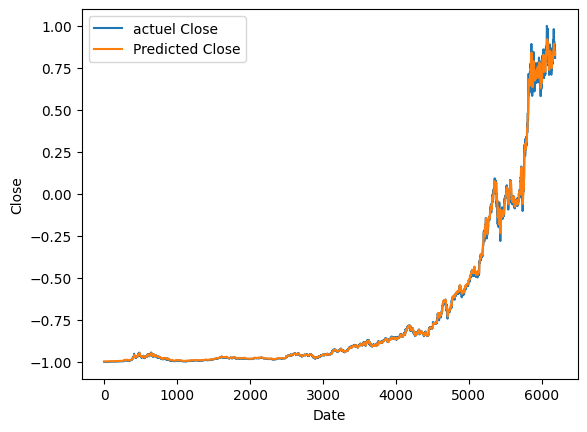

In [ ]:
with torch.no_grad():
  # Keep X_train as a tensor and send it to the correct device
  prediction = model(X_train.to(device))
  # Move the prediction to the CPU and convert to NumPy if needed
  prediction = prediction.cpu().numpy()

plt.plot(y_train, label="actuel Close")
plt.plot(prediction, label="Predicted Close")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.show()